# Exploratory Data Analysis

In [1]:
# imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from atel.data import BookCollection

sns.set()

In [2]:
# load data
book_col = BookCollection(data_file='./book_col_271120.pkl')

Loaded from disk: ./book_col_271120.pkl


In [3]:
# Total number of books
print(f'Number of books: {book_col.num_books}')

Number of books: 803


In [4]:
for key, value in book_col[0].code_dict.items():
    print(f"\t{key:25s}\t{value}")

	Genre                    	['Selvportræt']
	Attitude                 	['Bedømmelse positiv']
	Stavning                 	['Semifonetisk']
	Perspektiv               	Eksplicit fortæller
	Tekstbånd                	
	Fremstillingsform        	['Beskrivende']
	Semantisk univers        	['Mennesker']
	Holistisk vurdering      	1
	Stemmer                  	['En stemme']


In [5]:
features = []

for i in range(book_col.num_books):
    if book_col[i].code_dict is None:
        print(i)
        continue
    else:
        features.append(book_col[i].code_dict)

509


Here, we notice that book with index 509 does not have a `code_dict` describing the features

In [6]:
feat_df = pd.DataFrame(features)

In [7]:
feat_df

,Genre,Attitude,Stavning,Perspektiv,Tekstbånd,Fremstillingsform,Semantisk univers,Holistisk vurdering,Stemmer,Forbindere,Interjektioner,Metaforbrug,Noter
0,[Selvportræt],[Bedømmelse positiv],[Semifonetisk],Eksplicit fortæller,,[Beskrivende],[Mennesker],1,[En stemme],NaN,NaN,NaN,NaN
1,[Rim og remser],NaN,[Fonetisk],Implicit fortæller,[Semantisk],[Beskrivende],[Vilde dyr],1,[En stemme],NaN,NaN,NaN,NaN
2,,[Følelse 1. person],[Semifonetisk],Eksplicit fortæller,NaN,[Beskrivende],[Mig selv],0,[En stemme],[Tilføjelse],NaN,NaN,NaN
3,[Hverdagsbeskrivelse],NaN,"[Semifonetisk, Fonetisk]",Implicit fortæller,NaN,[Beskrivende],[Kæledyr],1,[En stemme],NaN,NaN,NaN,NaN
4,[Hverdagsbeskrivelse],[Følelse 3. person],[Konventionel skrivning],Implicit fortæller,NaN,[Beskrivende],[Familie],2,[En stemme],NaN,[Attitude],NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
797,[Fagbog],"[Bedømmelse positiv, Vurdering positiv]",[Overgangsskrivning],Implicit fortæller,[Pronominel],[Beskrivende],"[Bøger, film, musik, computerspil]",3,[Flere konkrete stemmer],"[Tid, Modsætning]",NaN,NaN,NaN
798,[Særdagsberetning],[Vurdering positiv],[Konventionel skrivning],Eksplicit fortæller,[Pronominel],"[Berettende, Instruerende, Holdningstilkendegi...",[Oplevelse],5,[En stemme],"[Tid, Årsag, Modsætning, Tilføjelse]",NaN,NaN,NaN
799,[Hverdagsbeskrivelse],[Bedømmelse positiv],[Konventionel skrivning],Implicit fortæller,NaN,[Holdningstilkendegivelse],[Kæledyr],1,[En stemme],NaN,NaN,NaN,NaN
800,[Hverdagsbeskrivelse],NaN,[Konventionel skrivning],Eksplicit fortæller,NaN,[Beskrivende],[Skole],2,[En stemme],[Modsætning],NaN,NaN,NaN


We see that some of the features have lists as values, e.g. one book can belong to multiple genres, accordingly to the PDF that is given as a supplement. These features are `Genre`, `Attitude`, `Stavning`, `Perspektiv`, `Tekstbånd`, `Fremstillingsform`, `Semantisk univers`, `Stemmer`, `Forbindere`, `Interjektioner`.

## Features with multiple categories
Let us take a closer look at how many of these exactly belong to multiple categories:

### Genre

In [8]:
feat_df.Genre.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    781
0     15
2      6
Name: Genre, dtype: int64

We replace the `NaN` values and empty strings with an empty list `[]`

In [9]:
feat_df.Genre.loc[feat_df.Genre.isnull()] = feat_df.Genre.loc[feat_df.Genre.isnull()].apply(lambda x: [],)

In [10]:
feat_df.Genre.loc[feat_df.Genre == ''] = feat_df.Genre.loc[feat_df.Genre == ''].apply(lambda x: [],)

### Attitude

In [11]:
feat_df.Attitude.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    351
1    279
2    111
3     53
4      7
5      1
Name: Attitude, dtype: int64

In [12]:
feat_df.Attitude.loc[feat_df.Attitude.isnull()] = feat_df.Attitude.loc[feat_df.Attitude.isnull()].apply(lambda x: [],)

In [13]:
feat_df.Attitude.loc[feat_df.Attitude == ''] = feat_df.Attitude.loc[feat_df.Attitude == ''].apply(lambda x: [],)

## Stavning

In [14]:
feat_df.Stavning.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    780
2     12
0     10
Name: Stavning, dtype: int64

In [15]:
feat_df.Stavning.loc[feat_df.Stavning.isnull()] = feat_df.Stavning.loc[feat_df.Stavning.isnull()].apply(lambda x: [],)


## Tekstbånd

In [16]:
feat_df.Tekstbånd.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    277
0    205
2    204
3     96
4     20
Name: Tekstbånd, dtype: int64

In [17]:
feat_df.Tekstbånd.loc[feat_df.Tekstbånd.isnull()] = feat_df.Tekstbånd.loc[feat_df.Tekstbånd.isnull()].apply(lambda x: [],)
feat_df.Tekstbånd.loc[feat_df.Tekstbånd == ''] = feat_df.Tekstbånd.loc[feat_df.Tekstbånd == ''].apply(lambda x: [],)


## Fremstillingsform

In [18]:
feat_df.Fremstillingsform.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    582
2    147
0     45
3     28
Name: Fremstillingsform, dtype: int64

In [19]:
feat_df.Fremstillingsform.loc[feat_df.Fremstillingsform.isnull()] = feat_df.Fremstillingsform.loc[feat_df.Fremstillingsform.isnull()].apply(lambda x: [],)

## Semantisk Univers

In [76]:
feat_df['Semantisk univers'].map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    739
2     40
0     16
3      6
4      1
Name: Semantisk univers, dtype: int64

In [75]:
feat_df['Semantisk univers'].loc[feat_df['Semantisk univers'].isnull()] = feat_df['Semantisk univers'].loc[feat_df['Semantisk univers'].isnull()].apply(lambda x: [],)

# "Vilde dyr" is there twice due to typo:
feat_df['Semantisk univers'] = feat_df['Semantisk univers'].apply(lambda x: ['Vilde dyr' if i=='Vilde dyr\xa0' else i for i in x])

## Stemmer

In [14]:
feat_df.Stemmer.map(lambda x: len(x) if type(x) == list else 0).value_counts()

1    790
0      8
2      4
Name: Stemmer, dtype: int64

In [78]:
feat_df.Stemmer.loc[feat_df.Stemmer.isnull()] = feat_df.Stemmer.loc[feat_df.Stemmer.isnull()].apply(lambda x: [],)

## Forbindere

In [79]:
feat_df.Forbindere.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    430
1    208
2     98
3     42
4     20
5      4
Name: Forbindere, dtype: int64

In [81]:
feat_df.Forbindere.loc[feat_df.Forbindere.isnull()] = feat_df.Forbindere.loc[feat_df.Forbindere.isnull()].apply(lambda x: [],)
feat_df.Forbindere.loc[feat_df.Forbindere == ''] = feat_df.Forbindere.loc[feat_df.Forbindere == ''].apply(lambda x: [],)


## Interjektioner

In [16]:
feat_df.Interjektioner.map(lambda x: len(x) if type(x) == list else 0).value_counts()

0    656
1    130
2     16
Name: Interjektioner, dtype: int64

In [ ]:
feat_df.Interjektioner.loc[feat_df.Interjektioner.isnull()] = feat_df.Interjektioner.loc[feat_df.Interjektioner.isnull()].apply(lambda x: [],)


*Hvad ser vi?*

## Value counts in each category

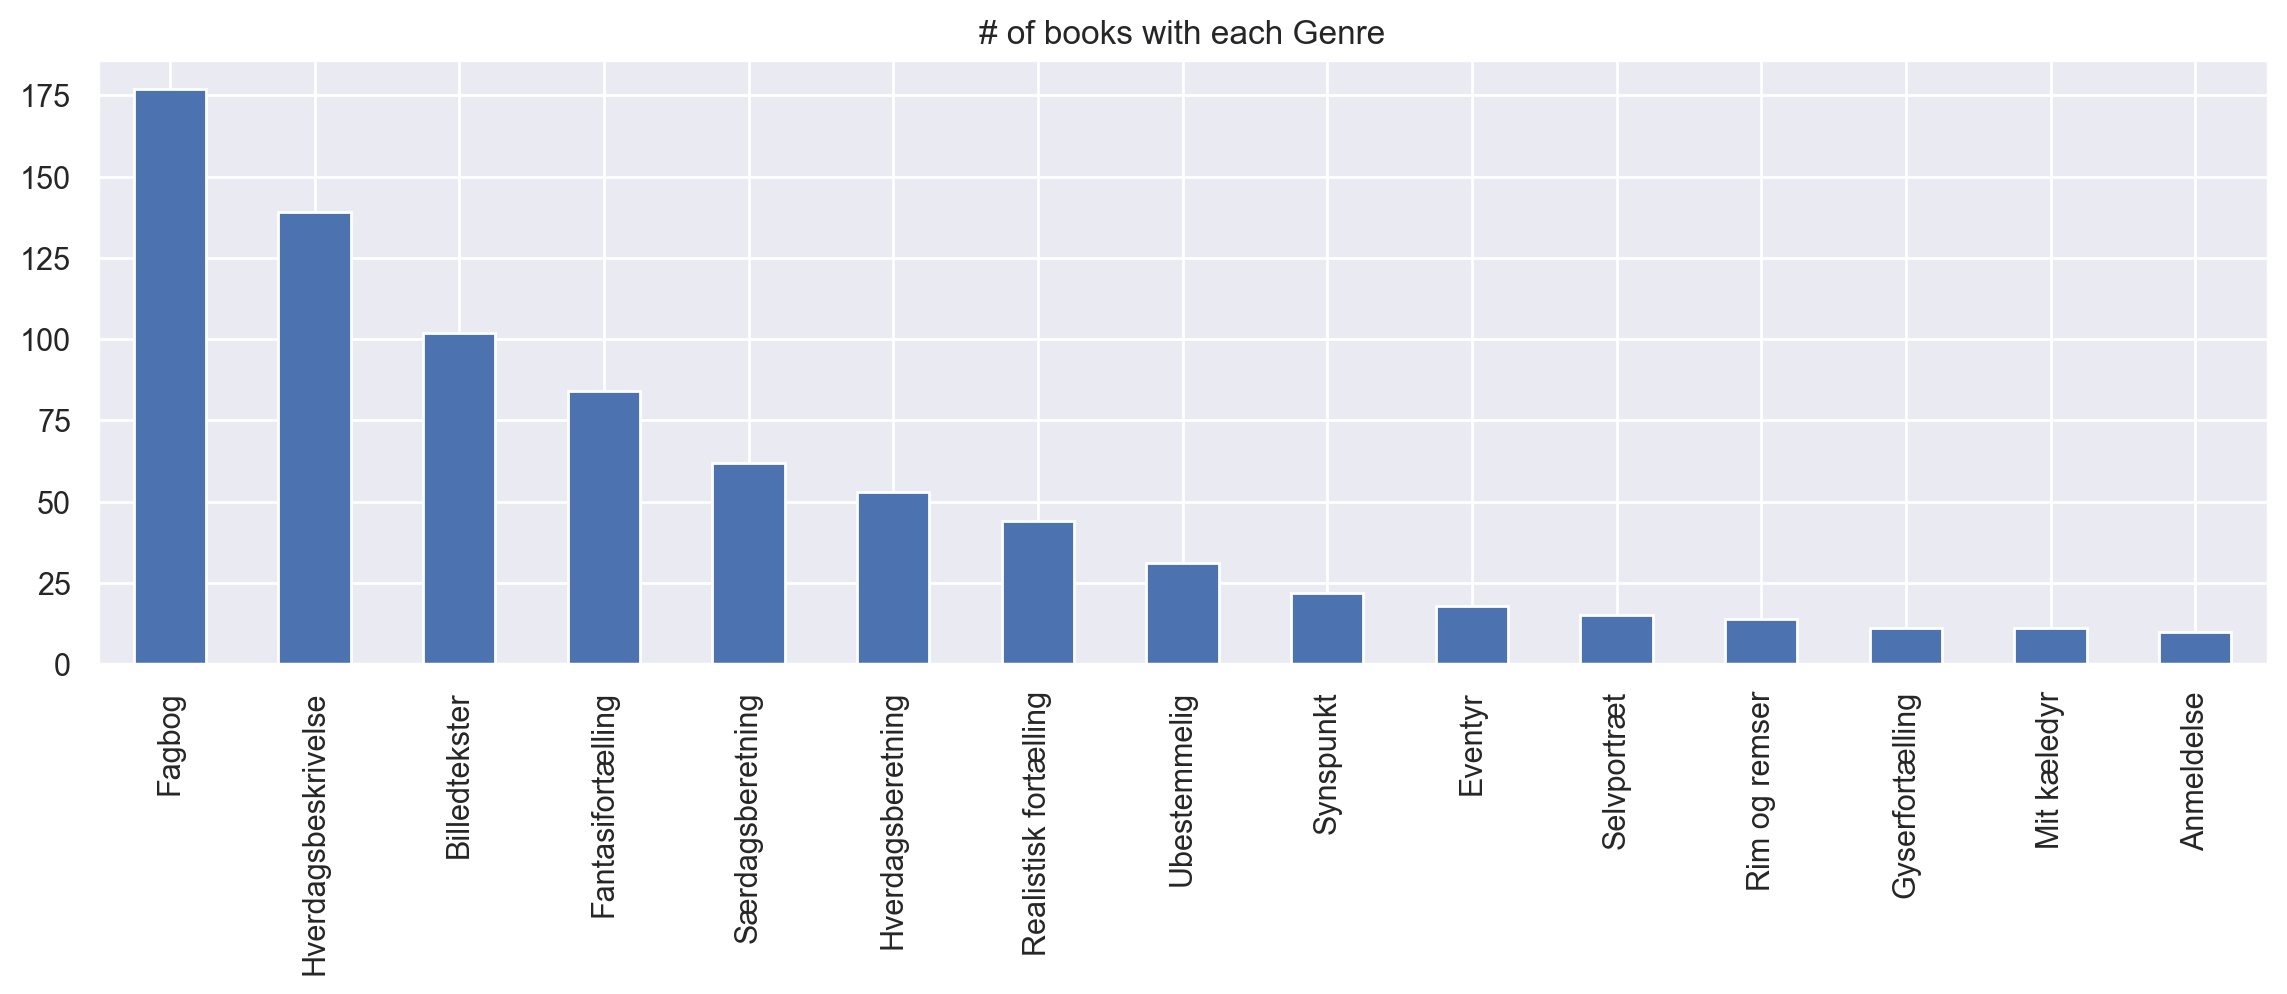

In [143]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Genre.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='# of books with each Genre')
plt.show()

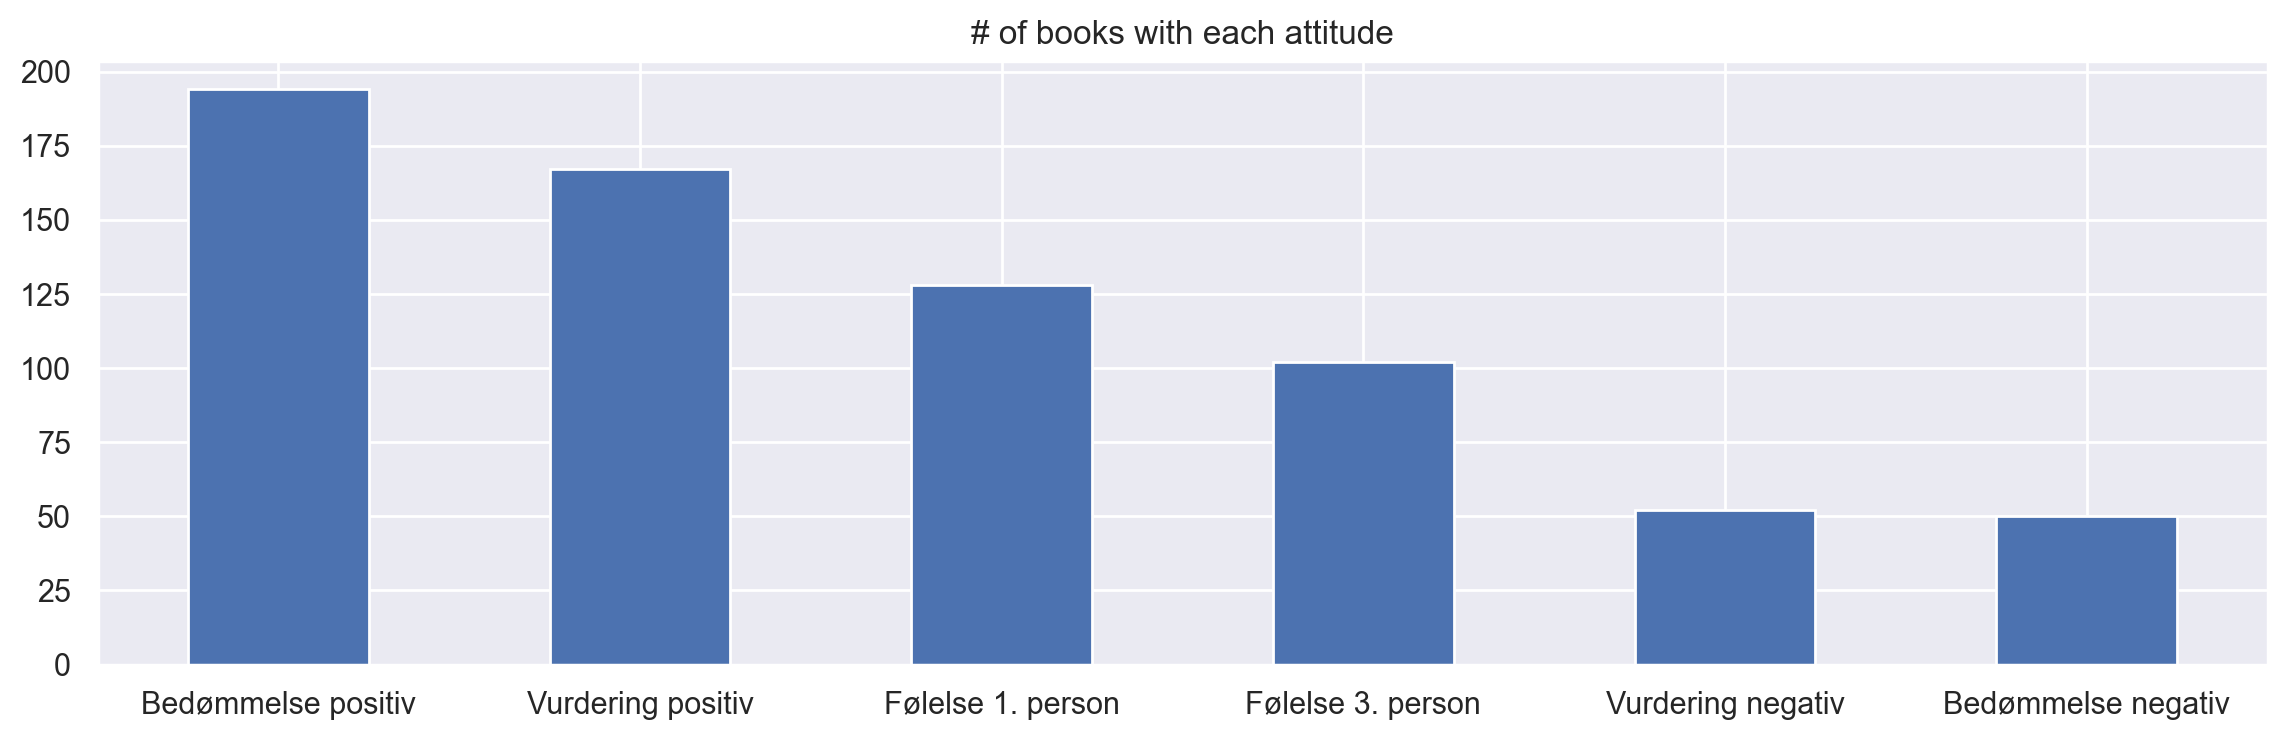

In [154]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Attitude.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='# of books with each attitude')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

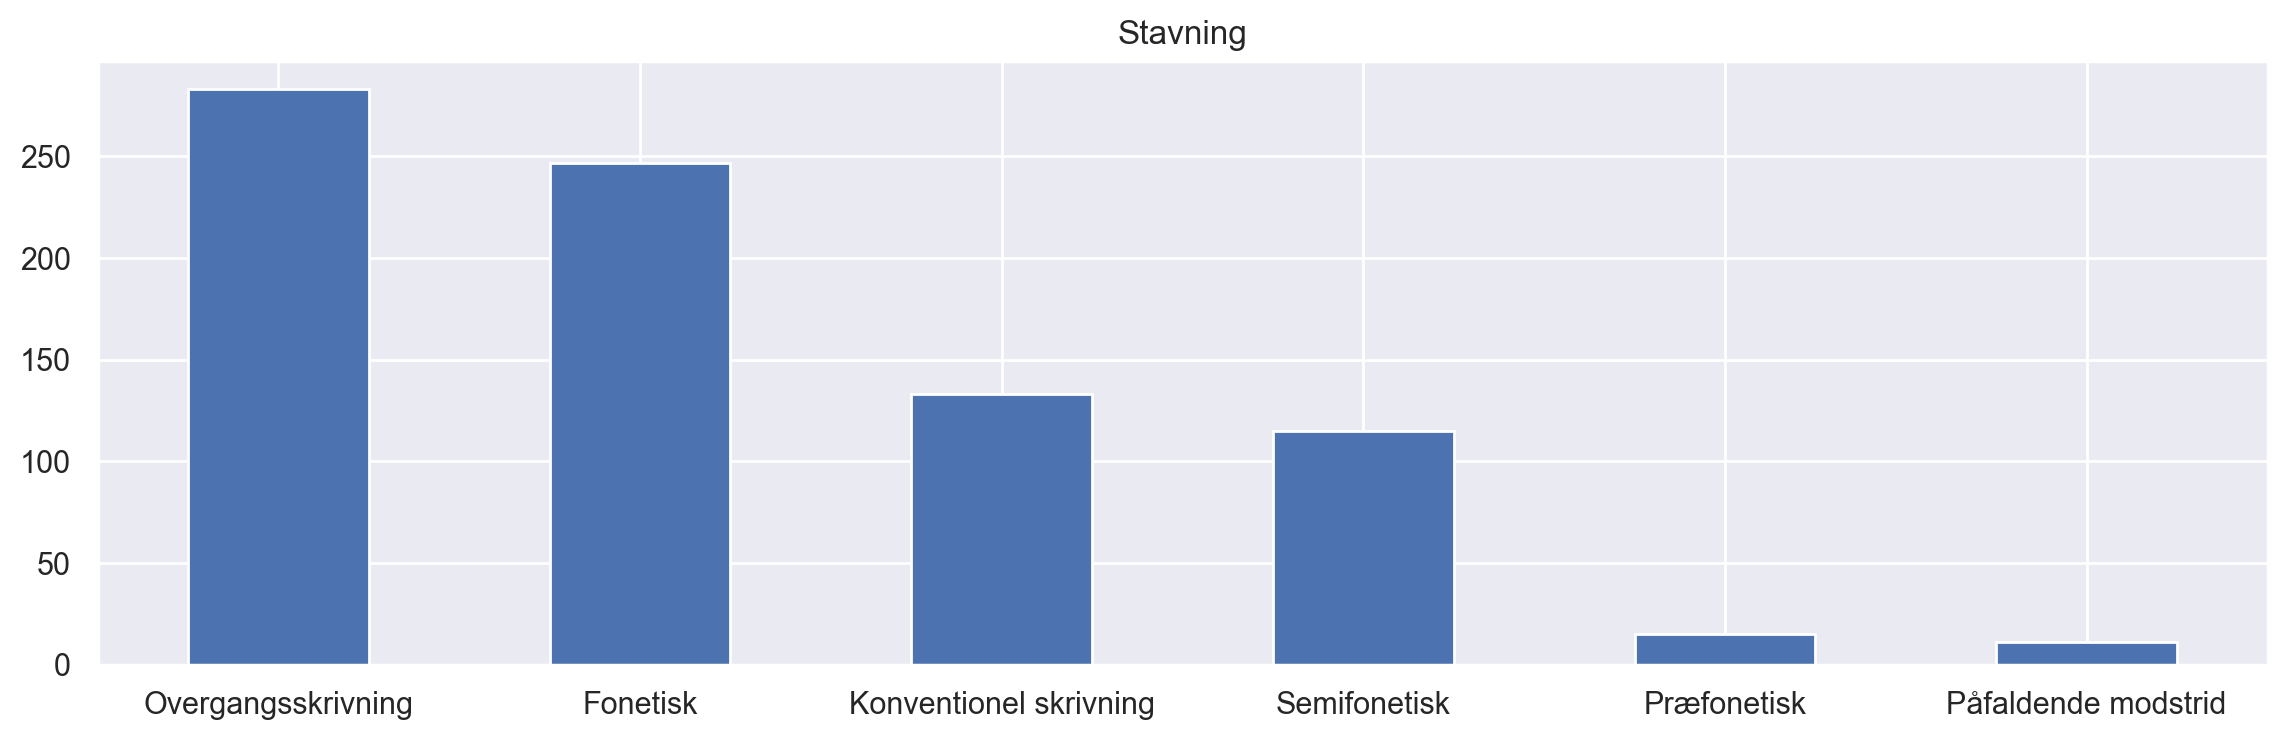

In [157]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Stavning.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Stavning')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

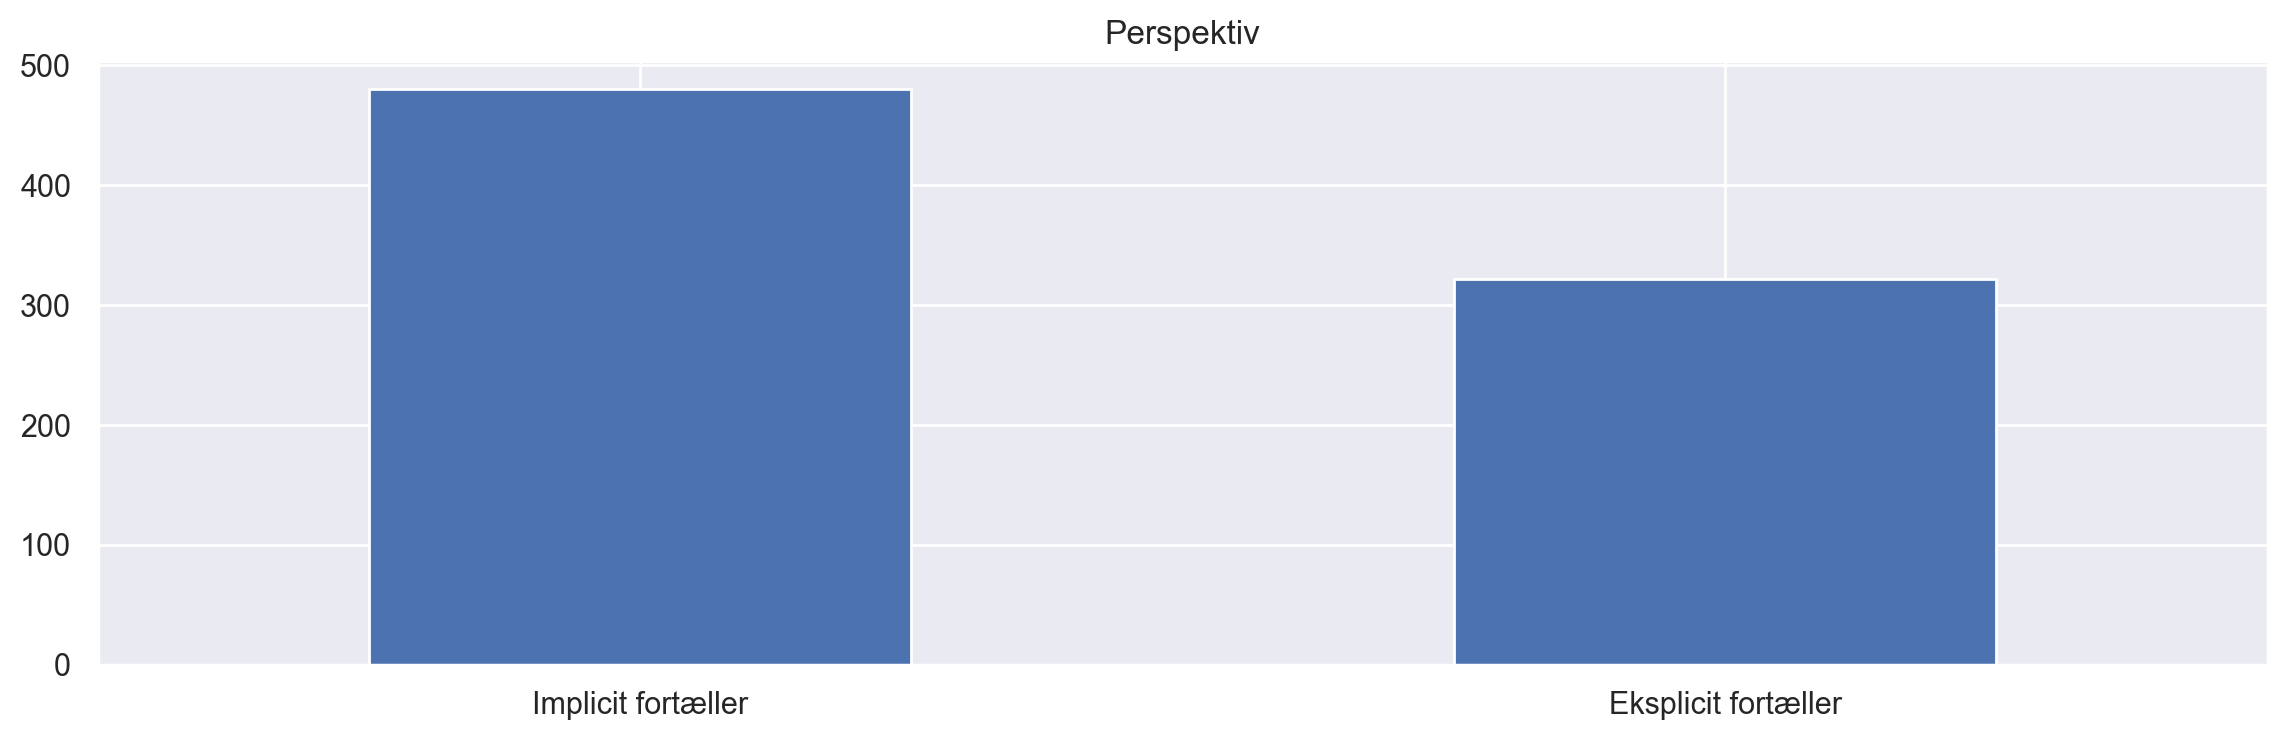

In [158]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Perspektiv.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Perspektiv')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

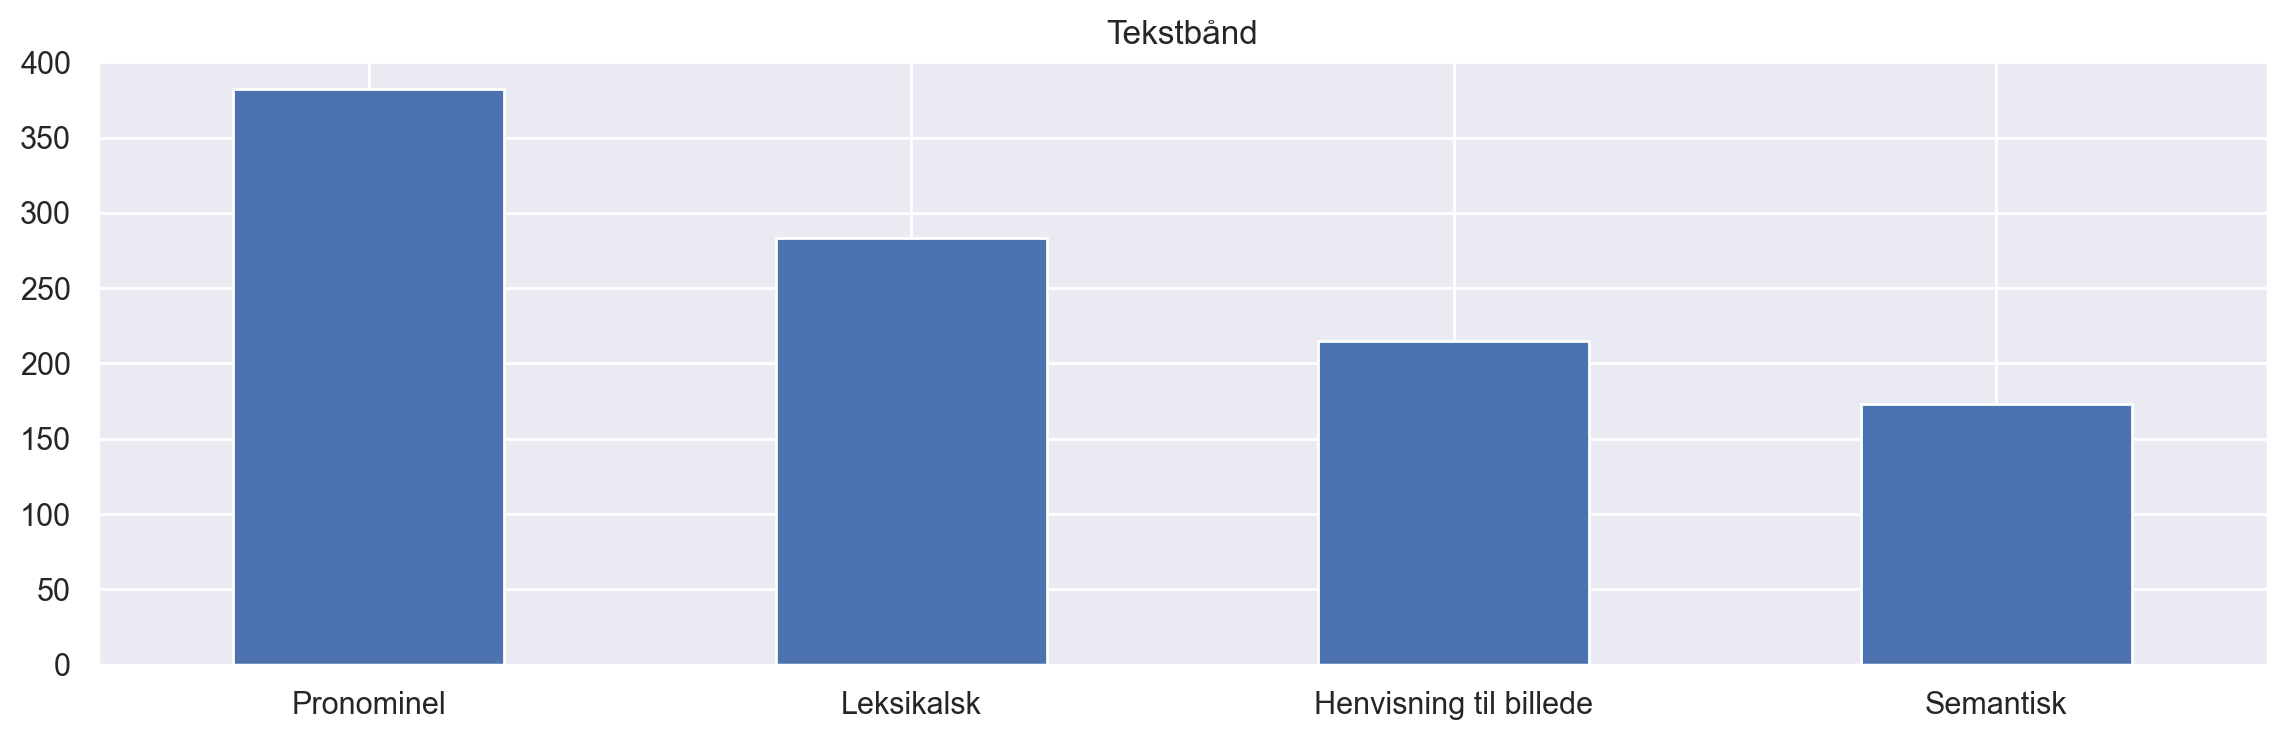

In [159]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Tekstbånd.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Tekstbånd')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

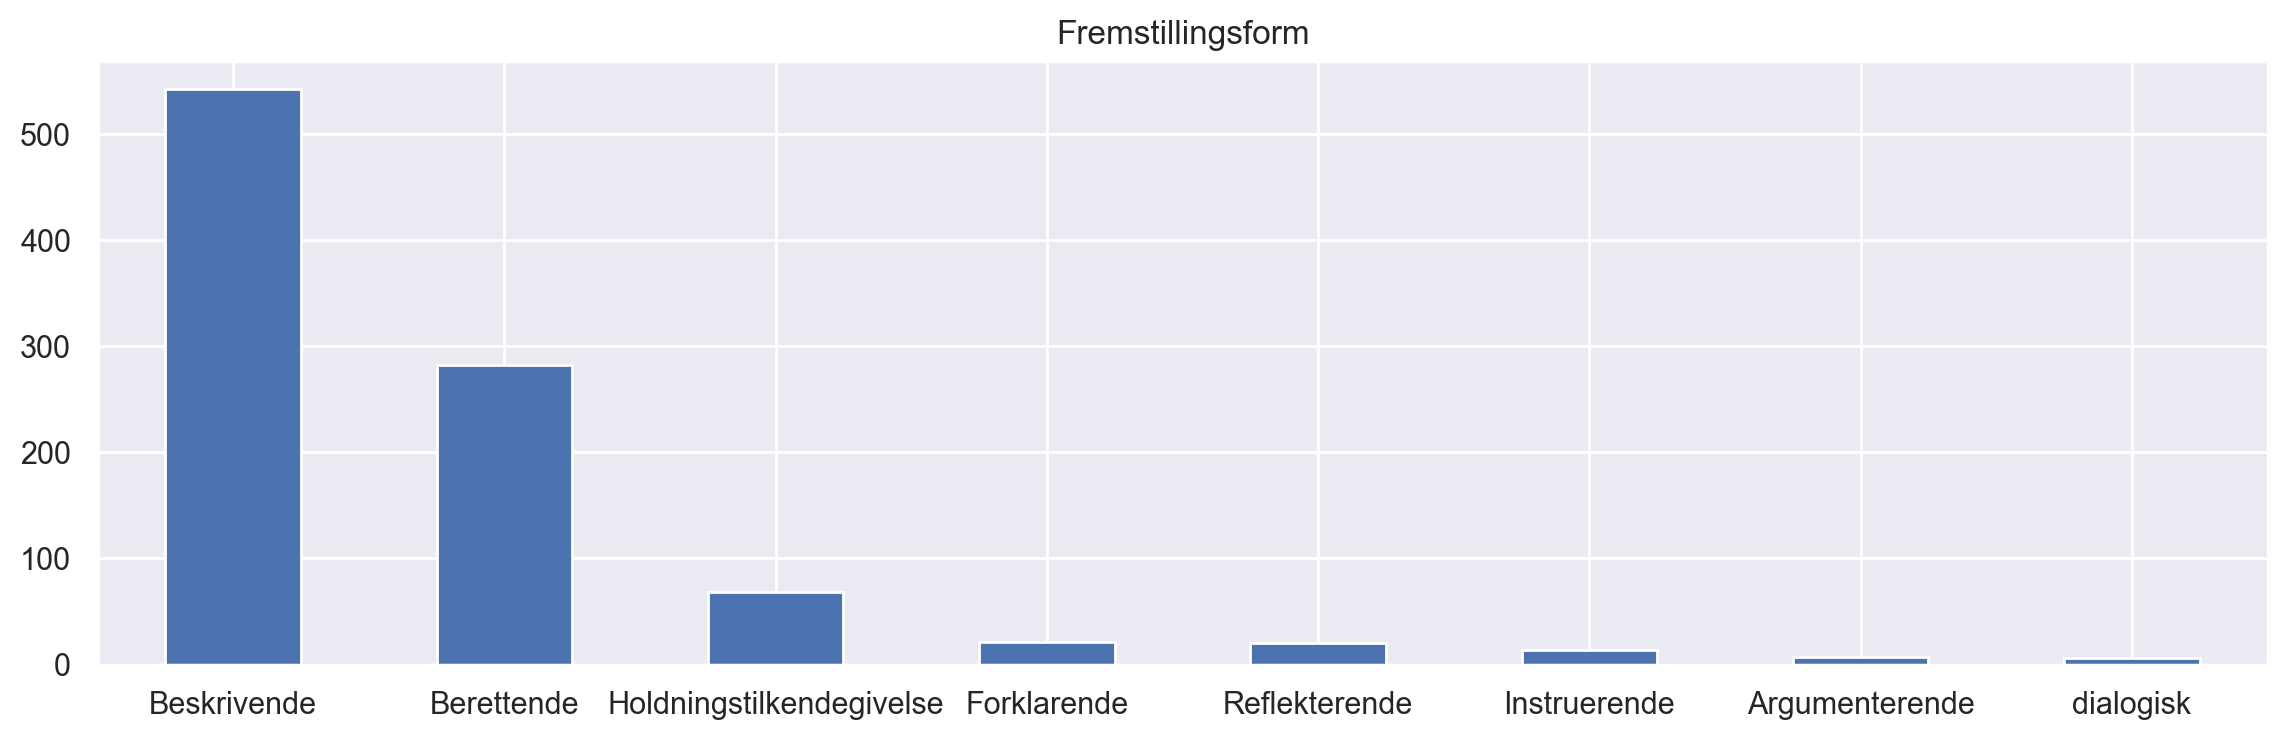

In [160]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Fremstillingsform.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Fremstillingsform')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

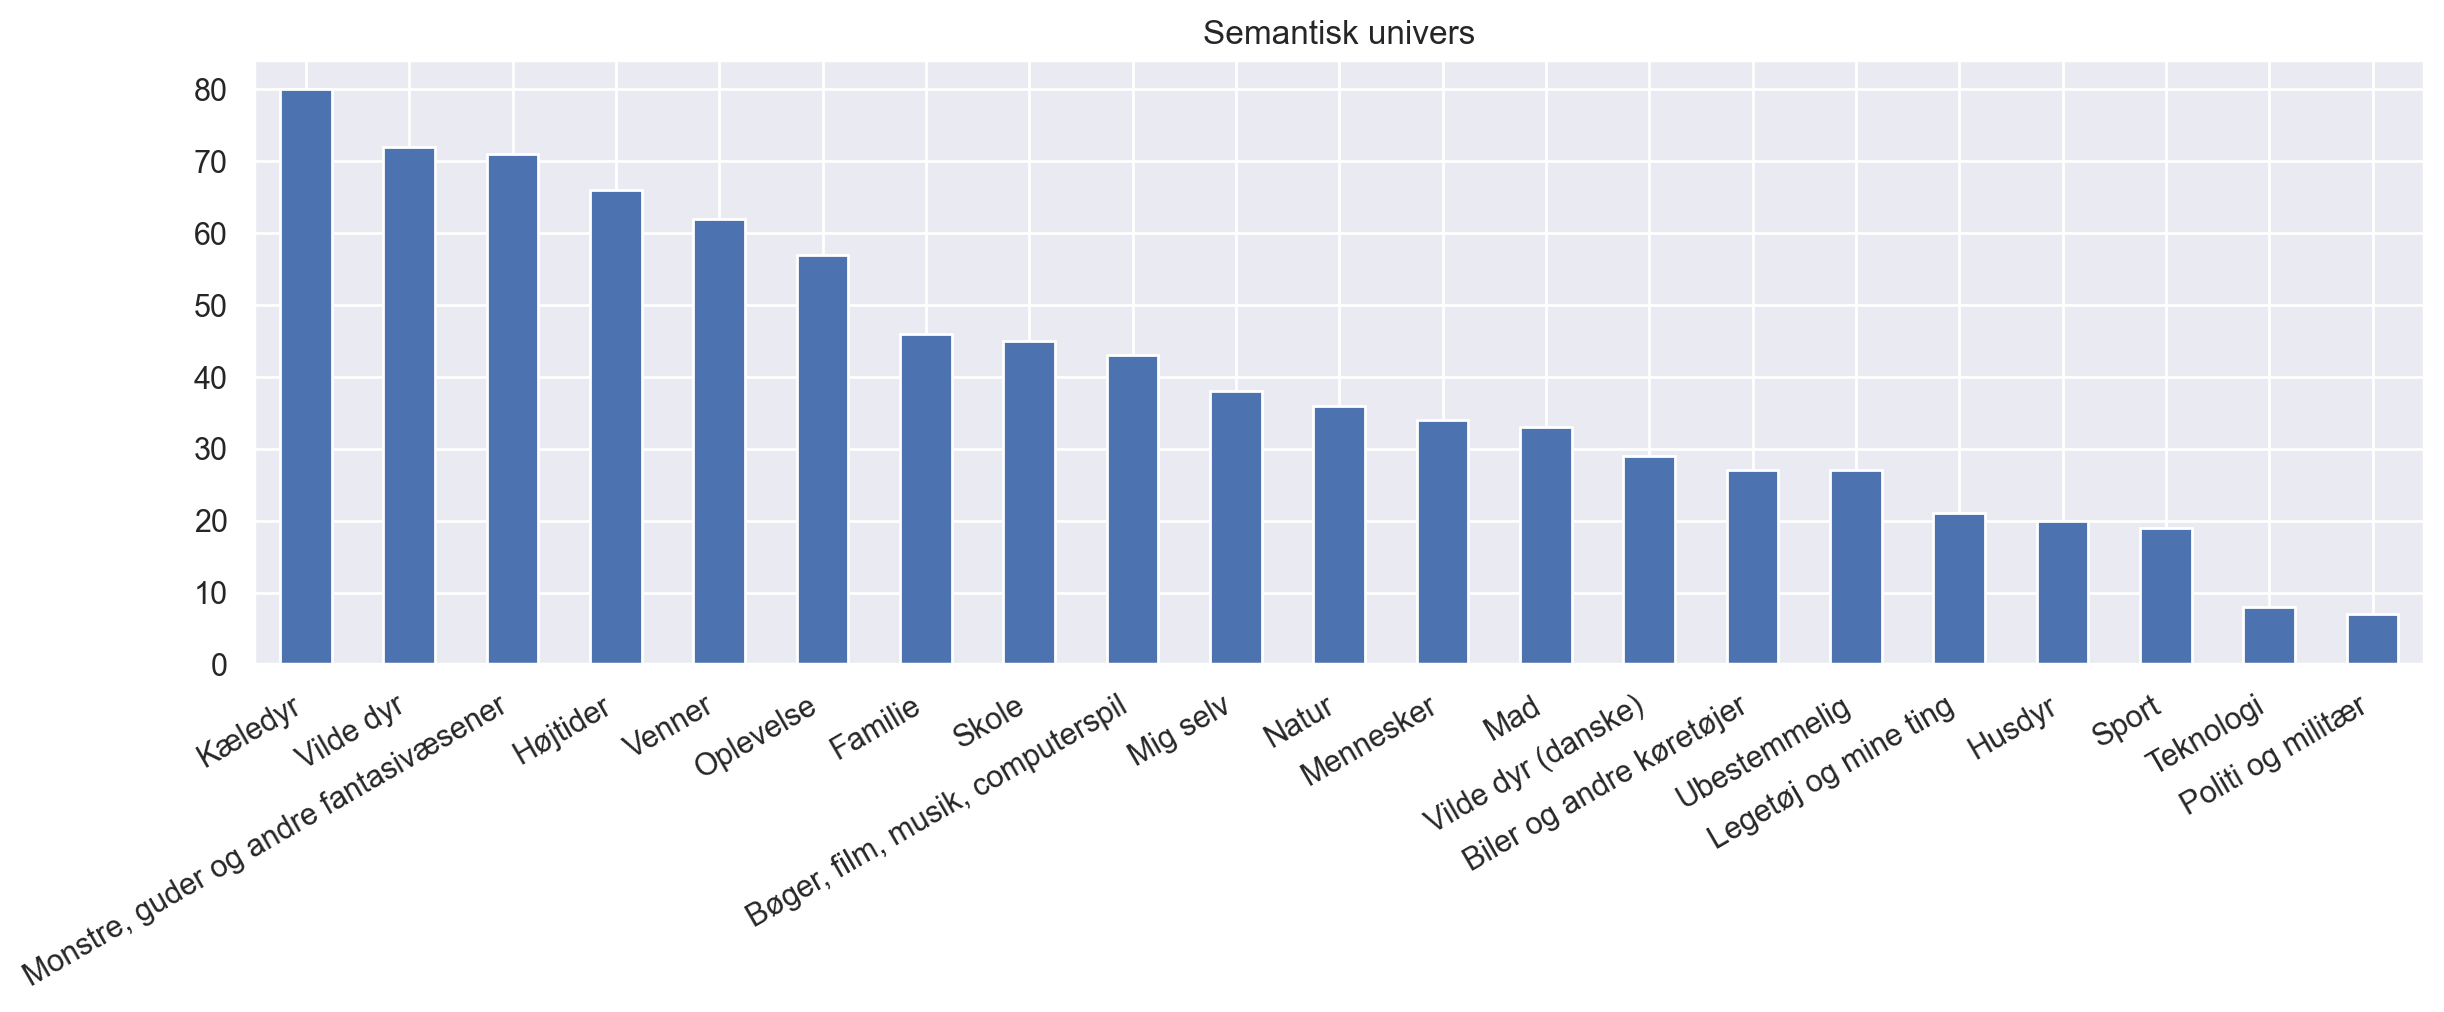

In [77]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df['Semantisk univers'].apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Semantisk univers')
axes.set_xticklabels(axes.get_xticklabels(), rotation=30, ha='right')
plt.show()

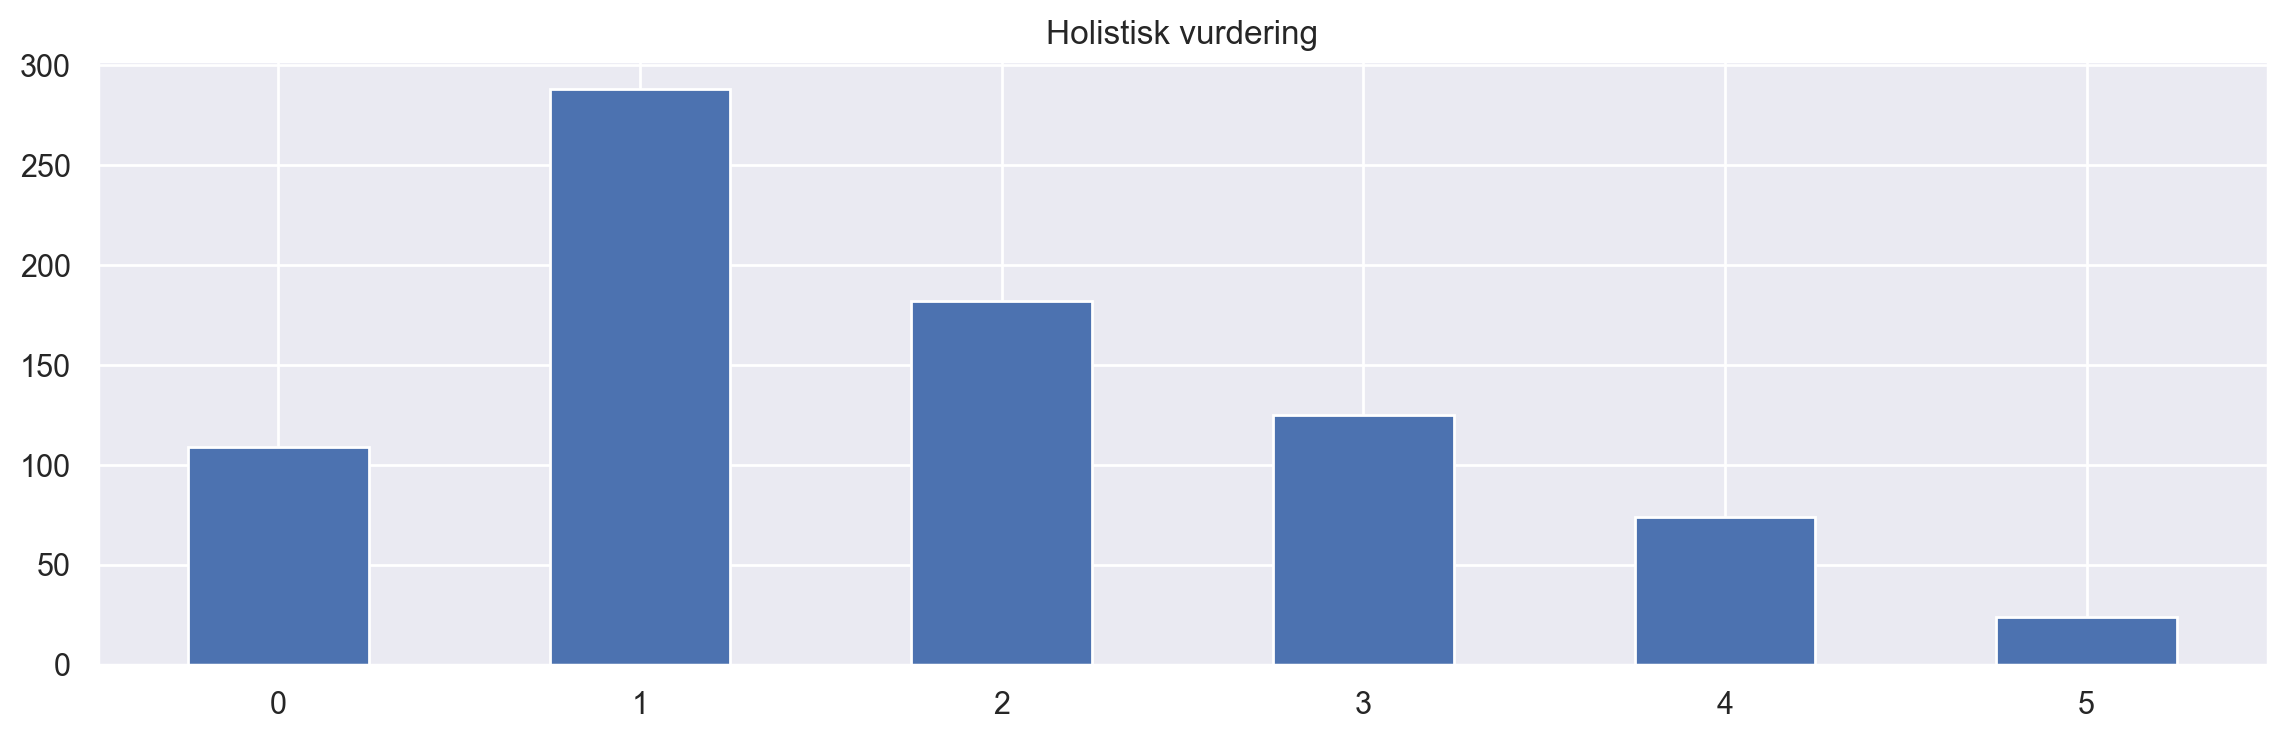

In [182]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df['Holistisk vurdering'].apply(pd.Series).stack().reset_index(drop=True).value_counts().sort_index().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Holistisk vurdering')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

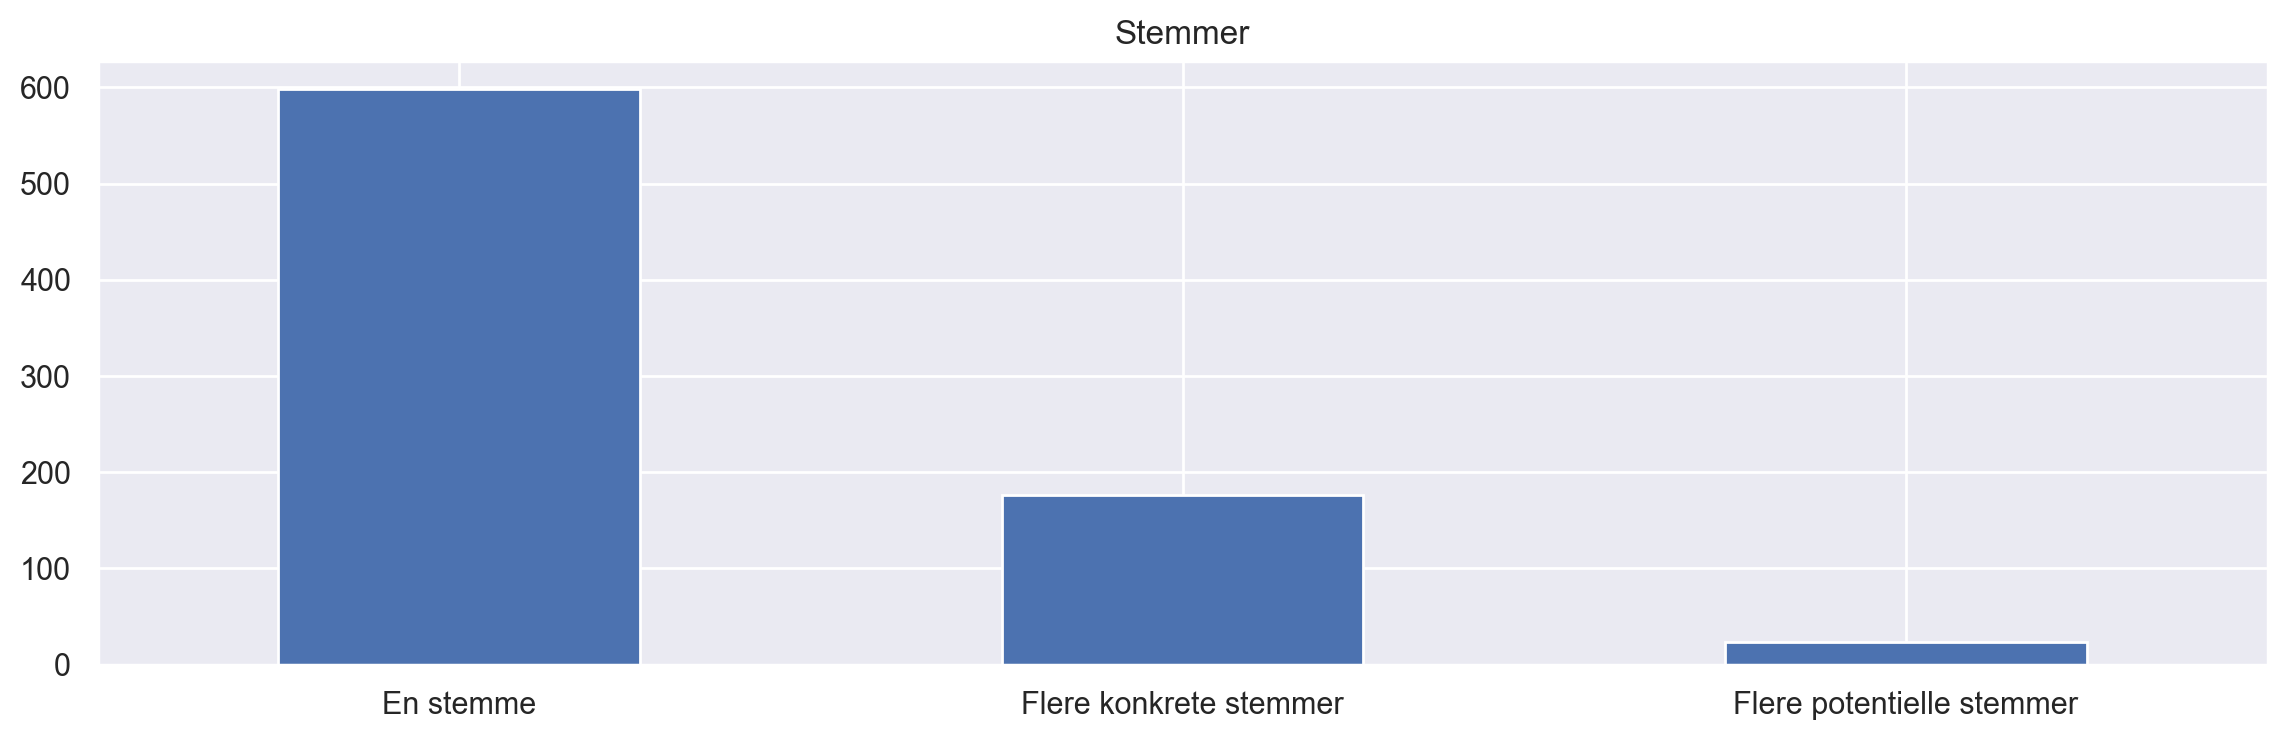

In [183]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Stemmer.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Stemmer')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

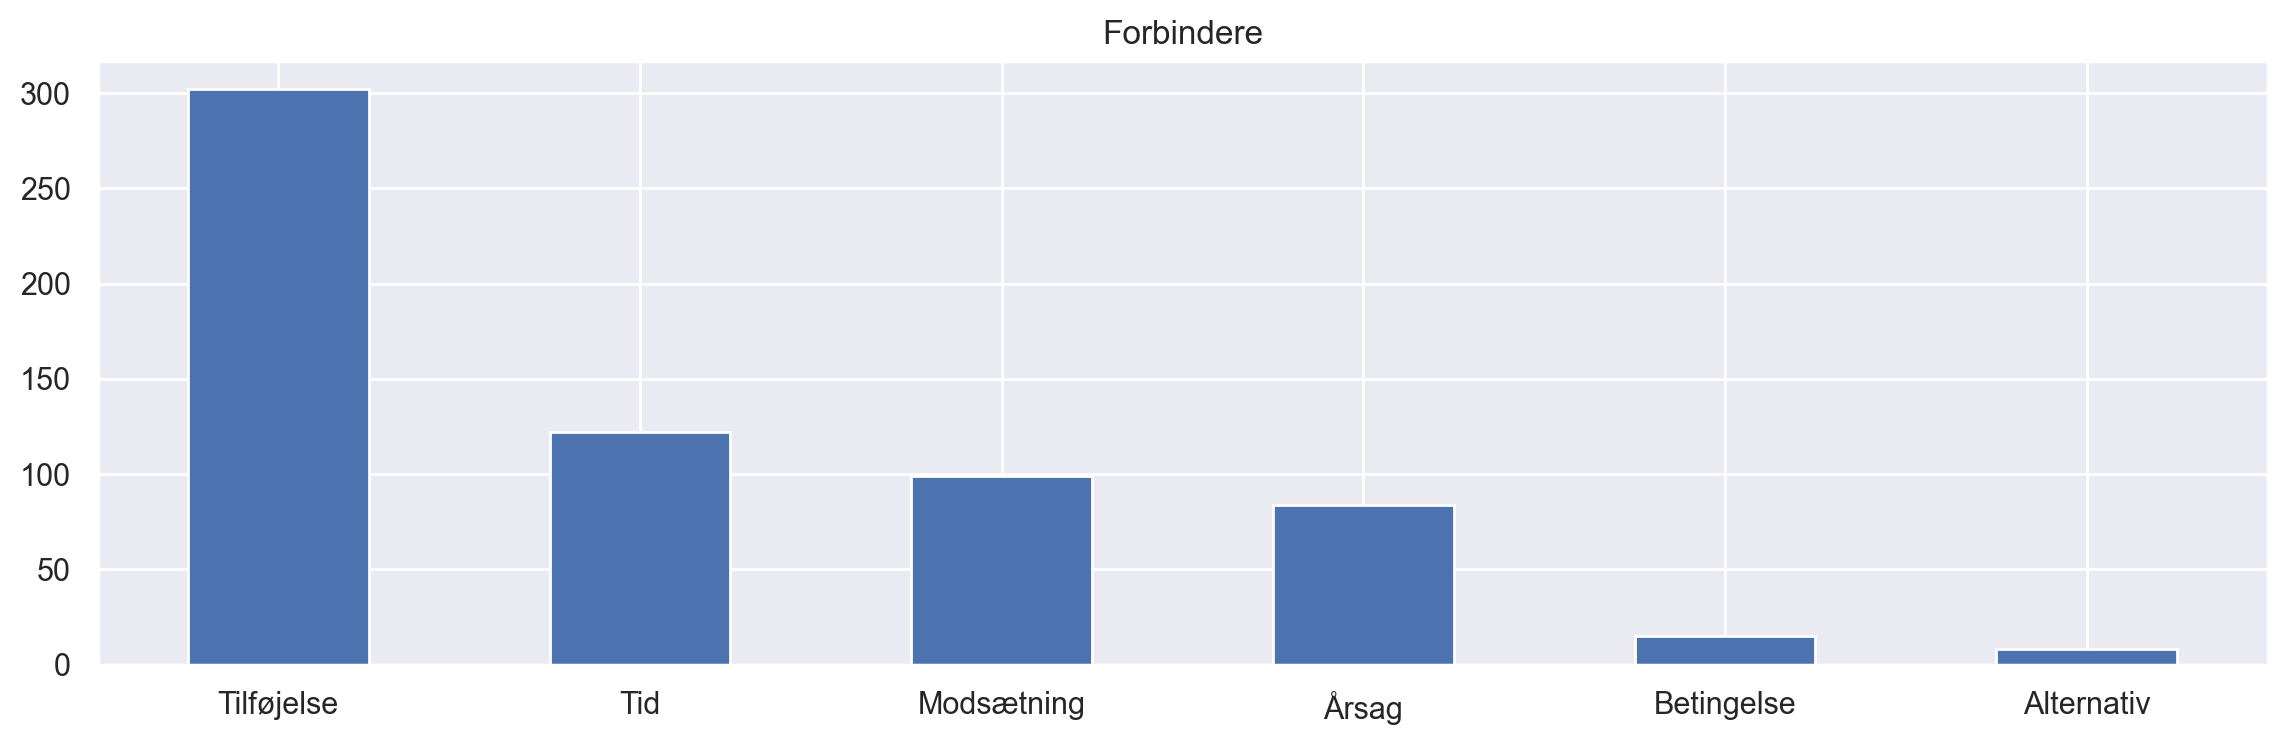

In [82]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Forbindere.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Forbindere')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

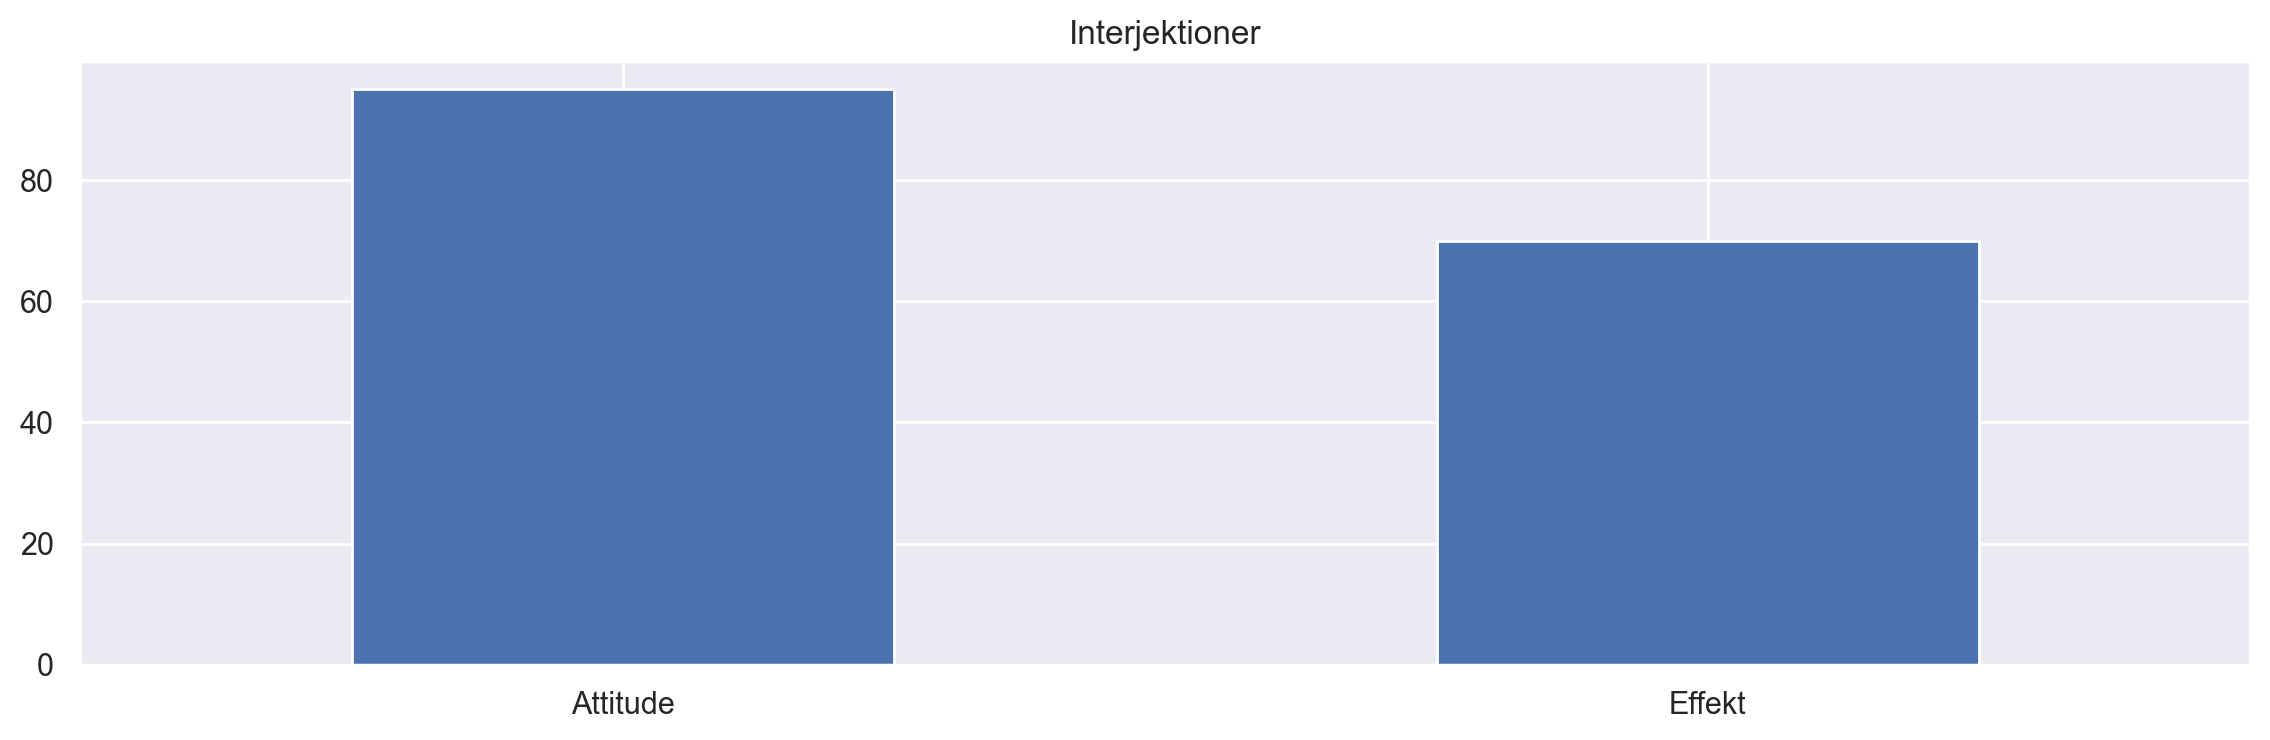

In [83]:
fig, axes = plt.subplots(figsize=(14,4),dpi=200)
feat_df.Interjektioner.apply(pd.Series).stack().reset_index(drop=True).value_counts().plot(kind='bar', 
                                                                                  ax=axes, 
                                                                                  title='Interjektioner')
axes.set_xticklabels(axes.get_xticklabels(), rotation=0)
plt.show()

For use of metaphors, let us first check the value counts:

In [86]:
feat_df.Metaforbrug.value_counts()

Til stede    10
              1
Name: Metaforbrug, dtype: int64

Only 10 of the values (~1%) use metaphors, where others are NaN. This means that there is either no methaphors or no note of these, making it difficult to judge.